In [1]:
import akshare as ak

In [2]:
stock_us_hist_df = ak.stock_us_hist(symbol='106.TTE', start_date="20210101", end_date="20250330")
print(stock_us_hist_df)

              日期     开盘     收盘     最高     最低      成交量          成交额    振幅  \
0     2021-01-04  43.02  42.38  43.06  42.02  2286144   96935556.0  2.48   
1     2021-01-05  42.89  43.48  44.08  42.86  3579447  155945578.0  2.88   
2     2021-01-06  45.25  45.54  45.98  45.01  4041173  184112927.0  2.23   
3     2021-01-07  45.52  46.19  46.31  45.44  2649081  121519305.0  1.91   
4     2021-01-08  45.96  45.90  46.09  45.45  1893021   86663817.0  1.39   
...          ...    ...    ...    ...    ...      ...          ...   ...   
1059  2025-03-24  62.88  62.95  63.20  62.67  1813892  114108804.0  0.84   
1060  2025-03-25  63.52  63.52  64.06  63.12  2034398  129166950.0  1.49   
1061  2025-03-26  65.21  64.87  65.62  64.77  2997837  195501022.0  1.34   
1062  2025-03-27  65.13  65.18  65.76  64.94  1651528  107798460.0  1.26   
1063  2025-03-28  64.50  64.15  64.56  63.92  1421243   91317677.0  0.98   

       涨跌幅   涨跌额   换手率  
0     1.12  0.47  0.09  
1     2.60  1.10  0.13  
2     4.74  

In [3]:
import ta
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = stock_us_hist_df.iloc[:,[0,2,3,4,5]]
df.columns = ['date','close','high','low','volume']

In [5]:
df

,date,close,high,low,volume
0,2021-01-04,42.38,43.06,42.02,2286144
1,2021-01-05,43.48,44.08,42.86,3579447
2,2021-01-06,45.54,45.98,45.01,4041173
3,2021-01-07,46.19,46.31,45.44,2649081
4,2021-01-08,45.90,46.09,45.45,1893021
...,...,...,...,...,...
1059,2025-03-24,62.95,63.20,62.67,1813892
1060,2025-03-25,63.52,64.06,63.12,2034398
1061,2025-03-26,64.87,65.62,64.77,2997837
1062,2025-03-27,65.18,65.76,64.94,1651528


In [6]:
df['label'] = df.close.shift(-1) - df.close
df.label = df.label.apply(lambda x: 0 if x < 0 else 1)
df.head()

<ipython-input-6-cc321932ad85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.close.shift(-1) - df.close
<ipython-input-6-cc321932ad85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label = df.label.apply(lambda x: 0 if x < 0 else 1)


,date,close,high,low,volume,label
0,2021-01-04,42.38,43.06,42.02,2286144,1
1,2021-01-05,43.48,44.08,42.86,3579447,1
2,2021-01-06,45.54,45.98,45.01,4041173,1
3,2021-01-07,46.19,46.31,45.44,2649081,0
4,2021-01-08,45.90,46.09,45.45,1893021,0


In [7]:
# Momentum indicators
df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
df['tsi'] = ta.momentum.tsi(close=df.close) # True strength index (TSI)

# Volatility indicators
bb_indicator = ta.volatility.BollingerBands(close=df.close)
df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator

# Trend indicators
#aroon_indicator = ta.trend.AroonIndicator(close=df.close)
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'])
macd_indicator = ta.trend.MACD(close=df.close)
kst_indicator = ta.trend.KSTIndicator(close=df.close)
df['aroon_down'] = aroon_indicator.aroon_down() # Aroon Down Channel
df['aroon'] = aroon_indicator.aroon_indicator() # Aroon Indicator
df['aroon_up'] = aroon_indicator.aroon_up() # Aroon Up Channel
df['macd_line'] = macd_indicator.macd() # MACD Line
df['macd_hist'] = macd_indicator.macd_diff() # MACD Histogram
df['macd_signal'] = macd_indicator.macd_signal() # MACD Signal Line
df['kst'] = kst_indicator.kst() # Know Sure Thing (KST)
df['kst_diff'] = kst_indicator.kst_diff() # Diff Know Sure Thing (KST)
df['kst_signal'] = kst_indicator.kst_sig() # Signal Line Know Sure Thing (KST)
df['dpo'] = ta.trend.dpo(close=df.close) # Detrended Price Oscillator (DPO)
df['trix'] = ta.trend.trix(close=df.close) # Trix (TRIX)
df['sma_10'] = ta.trend.sma_indicator(close=df.close, window=10) # SMA n=10
df['sma_20'] = ta.trend.sma_indicator(close=df.close, window=20) # SMA n=20
df['sma_30'] = ta.trend.sma_indicator(close=df.close, window=30) # SMA n=30
df['sma_60'] = ta.trend.sma_indicator(close=df.close, window=60) # SMA n=60
df['ema_10'] = ta.trend.ema_indicator(close=df.close, window=10) # EMA n=10
df['ema_20'] = ta.trend.ema_indicator(close=df.close, window=20) # EMA n=20
df['ema_30'] = ta.trend.ema_indicator(close=df.close, window=30) # EMA n=30
df['ema_60'] = ta.trend.ema_indicator(close=df.close, window=60) # EMA n=60

# Volume indicators
df['obv'] = ta.volume.on_balance_volume(close=df.close, volume=df.volume) # On Balance Volume (OBV)
df['vpt'] = ta.volume.volume_price_trend(close=df.close, volume=df.volume) # Volume-price trend (VPT)
df['fi'] = ta.volume.force_index(close=df.close, volume=df.volume) # Force Index (FI)
df['nvi'] = ta.volume.negative_volume_index(close=df.close, volume=df.volume) # Negative Volume Index (NVI)

df.tail()

<ipython-input-7-e4604ce152c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
<ipython-input-7-e4604ce152c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
<ipython-input-7-e4604ce152c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,date,close,high,low,volume,label,roc,rsi,tsi,bb_bbhi,...,sma_30,sma_60,ema_10,ema_20,ema_30,ema_60,obv,vpt,fi,nvi
1059,2025-03-24,62.95,63.20,62.67,1813892,1,3.570253,60.894844,30.524006,0.0,...,61.458333,59.492000,62.832874,62.070952,61.485971,60.649960,120720773,94676.484968,84178.477748,2526.331852
1060,2025-03-25,63.52,64.06,63.12,2034398,1,3.469620,64.296165,30.276988,0.0,...,61.564000,59.645333,62.957806,62.208957,61.617198,60.744059,122755171,113097.562966,237811.103784,2526.331852
1061,2025-03-26,64.87,65.62,64.77,2997837,1,6.222368,70.778845,32.327665,0.0,...,61.693000,59.820167,63.305478,62.462390,61.827056,60.879336,125753008,176811.038249,781992.367529,2526.331852
1062,2025-03-27,65.18,65.76,64.94,1651528,0,5.966510,72.034512,34.369308,0.0,...,61.837000,59.997833,63.646300,62.721210,62.043375,61.020341,127404536,184703.341009,743418.269311,2538.404657
1063,2025-03-28,64.15,64.56,63.92,1421243,1,4.258085,62.434684,32.764193,0.0,...,61.940000,60.159000,63.737882,62.857285,62.179287,61.122953,125983293,162244.300045,428089.903695,2498.291788


In [8]:
df = df.set_index('date')
df['datetime'] = pd.to_datetime(df.index)
df['min_sin'] = np.sin(2 * np.pi * df.datetime.dt.minute / 60)
df['min_cos'] = np.cos(2 * np.pi * df.datetime.dt.minute / 60)
df['hour_sin'] = np.sin(2 * np.pi * df.datetime.dt.hour / 60)
df['hour_cos'] = np.cos(2 * np.pi * df.datetime.dt.hour / 60)
df['day_sin'] = np.sin(2 * np.pi * df.datetime.dt.day / 30)
df['day_cos'] = np.cos(2 * np.pi * df.datetime.dt.day / 30)
df['month_sin'] = np.sin(2 * np.pi * df.datetime.dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.datetime.dt.month / 12)

df = df.drop(['datetime'], axis=1)
df = df.drop(['high'], axis=1)
df = df.drop(['low'], axis=1)
print(df.shape)
df.tail()


(1064, 39)


,close,volume,label,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,...,fi,nvi,min_sin,min_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2025-03-24,62.95,1813892,1,3.570253,60.894844,30.524006,0.0,0.0,44.0,44.0,...,84178.477748,2526.331852,0.0,1.0,0.0,1.0,-0.951057,0.309017,1.0,6.123234e-17
2025-03-25,63.52,2034398,1,3.469620,64.296165,30.276988,0.0,0.0,40.0,44.0,...,237811.103784,2526.331852,0.0,1.0,0.0,1.0,-0.866025,0.500000,1.0,6.123234e-17
2025-03-26,64.87,2997837,1,6.222368,70.778845,32.327665,0.0,0.0,36.0,64.0,...,781992.367529,2526.331852,0.0,1.0,0.0,1.0,-0.743145,0.669131,1.0,6.123234e-17
2025-03-27,65.18,1651528,0,5.966510,72.034512,34.369308,0.0,0.0,32.0,68.0,...,743418.269311,2538.404657,0.0,1.0,0.0,1.0,-0.587785,0.809017,1.0,6.123234e-17
2025-03-28,64.15,1421243,1,4.258085,62.434684,32.764193,0.0,0.0,28.0,68.0,...,428089.903695,2498.291788,0.0,1.0,0.0,1.0,-0.406737,0.913545,1.0,6.123234e-17


In [9]:
df_na = df.dropna(axis=0)
print(df_na.shape)
df_na.head()

(1005, 39)


,close,volume,label,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,...,fi,nvi,min_sin,min_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2021-03-30,47.08,1224895,0,-6.327099,50.457750,5.641728,0.0,0.0,88.0,-36.0,...,-292014.944847,1101.696318,0.0,1.0,0.0,1.0,-1.133108e-15,1.000000,1.000000,6.123234e-17
2021-03-31,46.54,2247170,0,-5.483347,47.739061,4.289774,0.0,0.0,84.0,-36.0,...,-423651.638441,1101.696318,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,1.000000,6.123234e-17
2021-04-01,46.38,2402593,0,-4.646382,46.932173,2.951719,0.0,0.0,80.0,-36.0,...,-418046.387235,1101.696318,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,0.866025,-5.000000e-01
2021-04-05,46.03,1523123,0,-5.926834,45.135017,1.320348,0.0,0.0,76.0,-36.0,...,-434481.624773,1093.382525,0.0,1.0,0.0,1.0,8.660254e-01,0.500000,0.866025,-5.000000e-01
2021-04-06,46.02,2267822,1,-2.582557,45.081900,-0.042303,0.0,0.0,72.0,-36.0,...,-375652.566948,1093.382525,0.0,1.0,0.0,1.0,9.510565e-01,0.309017,0.866025,-5.000000e-01


In [10]:
labels = df_na.label
df_na = df_na.drop(['label'], axis=1)
df_na.columns

Index(['close', 'volume', 'roc', 'rsi', 'tsi', 'bb_bbhi', 'bb_bbli',
       'aroon_down', 'aroon', 'aroon_up', 'macd_line', 'macd_hist',
       'macd_signal', 'kst', 'kst_diff', 'kst_signal', 'dpo', 'trix', 'sma_10',
       'sma_20', 'sma_30', 'sma_60', 'ema_10', 'ema_20', 'ema_30', 'ema_60',
       'obv', 'vpt', 'fi', 'nvi', 'min_sin', 'min_cos', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_na)

test_size = 60
train = scaled_data[:-test_size]
test = scaled_data[-test_size:]
ytrain = train[:,0]
ytest = test[:,0]
Xtrain = train[:,1:]
Xtest = test[:,1:]

def create_sequences(X, Y, seq_length):
    xs, ys = [], []
    for i in range(len(X) - seq_length):
        x = X[i:i+seq_length]
        y = Y[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train = create_sequences(Xtrain, ytrain, seq_length)
X_test, y_test = create_sequences(Xtest, ytest, seq_length)

In [12]:
#LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
predict0 = []
dummy = np.zeros((len(y_test), df_na.shape[1]))
dummy[:, 0] = y_test
y_test = scaler.inverse_transform(dummy)[:, 0]

for i in range(10):
    model.fit(X_train, y_train, batch_size=32, epochs=50)

    predictions = model.predict(X_test)

    dummy = np.zeros((len(predictions), df_na.shape[1]))
    dummy[:, 0] = predictions[:, 0]
    predictions1 = scaler.inverse_transform(dummy)[:, 0]

    mse = np.mean((predictions1 - y_test) ** 2)
    acc = 100 * (1 - np.sqrt(np.mean(np.square((y_test - predictions1) / y_test))))

    print(f"mse: {mse}")
    print(f"acc: {acc}")
    predict0.append(predictions1)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0905
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0063
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epo

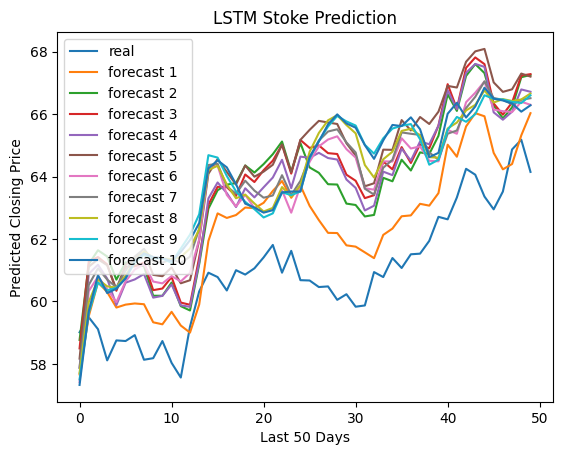

In [16]:
plt.plot(y_test, label='real')
for i in range(10):
    plt.plot(predict0[i], label='forecast %d'%(i + 1))
plt.title('LSTM Stoke Prediction')
plt.xlabel('Last 50 Days')
plt.ylabel('Predicted Closing Price')
plt.legend(loc='upper left')
plt.show()